## Stitching images given the path to folder

In [1]:
import cv2
import numpy as np
import os
import torch
import torch.nn.functional as F
from glob import glob

In [3]:
# Load the images
path="C://Users//mendoza//Downloads//images//images" #path to the folder containing images
obj=sorted(glob(path+"/*.JPG")) #sort the images according to the order of scanned
imgs = []
  
for i in range(len(obj)):
    imgs.append(cv2.imread(obj[i]))
    imgs[i]=cv2.resize(imgs[i],(0,0),fx=0.4,fy=0.4)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# create 6 random blobs to distinguish images, so that after stitching make sure that all images are being used
blob_size = 30
colors = [(254, 255, 255), (0, 200, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)]
blobs = []
for color in colors:
    blob = np.zeros((blob_size, blob_size, 3), dtype=np.uint8)
    cv2.circle(blob, (blob_size//2, blob_size//2), blob_size//2, color, -1)
    blobs.append(blob)

for img,color in zip(imgs,colors):
    h,w,_=img.shape
    blob = np.zeros((blob_size, blob_size, 3), dtype=np.uint8)
    cv2.circle(blob, (blob_size//2, blob_size//2), blob_size//2, color, -1)
    img[h//2-blob_size//2:h//2+blob_size//2,w//2-blob_size//2:w//2+blob_size//2]=blob


## Display all 6 images with blob in center as identifier

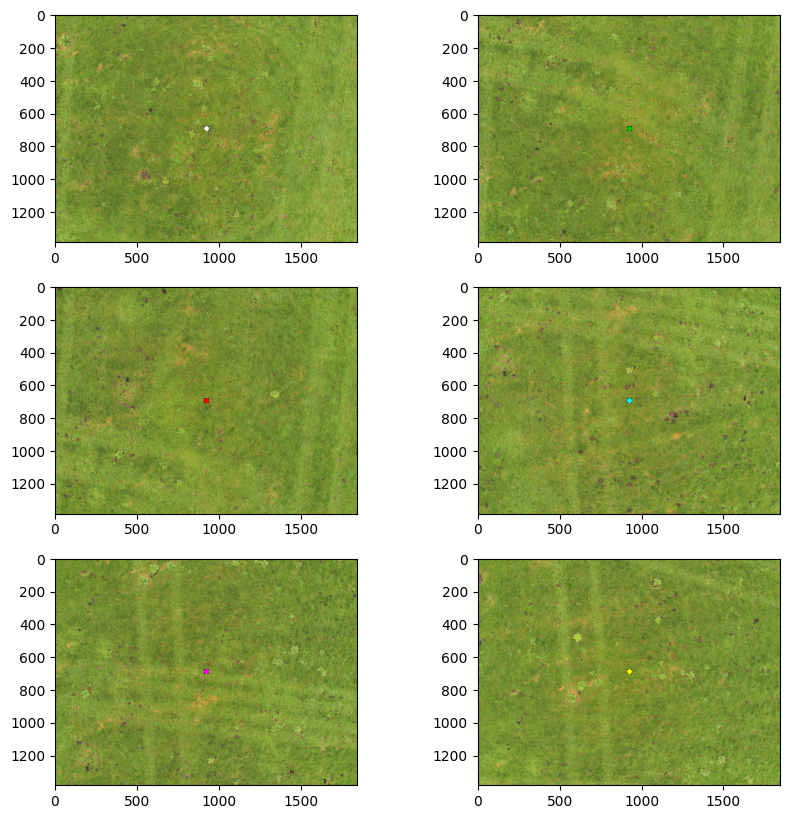

In [4]:
fig,ax=plt.subplots(3,2,figsize=(10,10))
c=0
for i in range(3):
    for j in range(2):
        ax[i][j].imshow(cv2.cvtColor(imgs[c],cv2.COLOR_BGR2RGB))
        c+=1
plt.show()

## Now use the open-cv stitching algorithm

In [5]:
stitchy=cv2.Stitcher_create(1) #SCANS

In [6]:
stitchy.setPanoConfidenceThresh(0.6) #confidence threshold for accepting a match between two images.

In [11]:
res,out=stitchy.stitch(imgs[::-1])
res

0

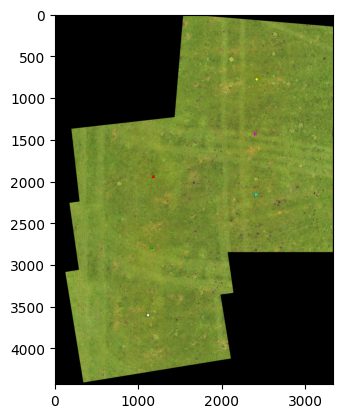

In [12]:
import matplotlib.pyplot as plt
out_rgb=cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.imshow(out_rgb)

In [4]:
import cv2
import numpy as np
import os
# Define parameters for generating new images
num_images = 200
crop_size = 512
max_rotation = 30
cropped_imgs=[]
# Generate new images
for i in range(num_images):
    # Select a random input image
    img = imgs[np.random.randint(len(imgs))]

    # Generate random rotation angle
    angle = np.random.randint(-max_rotation, max_rotation)

    # Rotate image
    rows, cols, _ = img.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    img_rot = cv2.warpAffine(img, M, (cols, rows))

    # Generate random crop position
    x = np.random.randint(0, cols-crop_size)
    y = np.random.randint(0, rows-crop_size)

    # Crop image
    img_crop = img_rot[y:y+crop_size, x:x+crop_size]
    cropped_imgs.append(img_crop)

    


In [5]:
stitchy=cv2.Stitcher_create(1) #SCANS
stitchy.setPanoConfidenceThresh(0.7)

In [ ]:
%%timeit
res,out_new=stitchy.stitch(cropped_imgs[::-1])

### as we see the random generated 200 images took so long, we need a faster algorithm.
#### we can use a deep learning approach to stitch images such as "StitchNet" which uses a UNET type model, where it passes all input images as stacked channels and the the UNET output is the stitched image.

## Bad weeds detection Classical approach

#### Stitch the images together using the existing algorithm to create a panoramic image of the field.
#### Convert the panoramic image to grayscale.
#### Apply a Gaussian blur to smooth the image and remove noise.
#### Apply an adaptive threshold to binarize the image, with a threshold value determined locally for each pixel based on the surrounding area.
#### Apply morphological operations such as erosion and dilation to remove small noise and fill small gaps between objects.
#### Apply contour detection to identify the weed objects in the image.
#### Filter out the weed objects based on their size, shape, and color features, to only keep the bad weeds.
#### Draw bounding boxes or circles around the bad weeds in the original panoramic image.

## Deeplearning approach

#### use mask-rcnn to have a segmented image to identify weed and not weed